In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import maximum_filter
from scipy.interpolate import interp1d

In [5]:
im = Image.open("data1.jpg")
im_bw = im.convert(mode="L") 

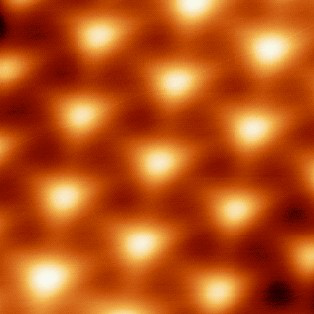

In [6]:
im

In [7]:
im_dat = im_bw.getdata() 
width, height = im_dat.size[0], im_dat.size[1]
im_dat = np.array(im_dat)
im_dat = im_dat.reshape(height, width)

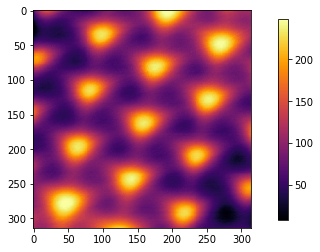

In [8]:
plt.figure() # Creating the figure
img = plt.imshow(im_dat, cmap = "inferno", vmin=np.min(im_dat), vmax=np.max(im_dat))
clb = plt.colorbar(img, fraction=0.03, pad=0.08) # Use these as your
plt.show() 

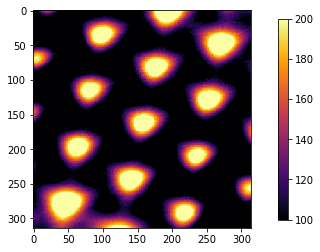

In [9]:
plt.figure() # Creating the figure
img_lim = plt.imshow(im_dat, interpolation = "nearest", cmap = "inferno",vmin = 100.0, vmax= 200)
clb = plt.colorbar(img_lim, fraction=0.03, pad=0.08) # Use these as your
plt.show() 

In [10]:
def threshold(image_array, thresh_val):
    
    shape = image_array.shape
    
    num_rows = shape[0]
    num_cols = shape[1]

    for j in range(num_cols):
       for i in range(num_rows):
         if image_array[i,j] < thresh_val:
           image_array[i,j] = 0

    return image_array


In [11]:
def data_plotter(dat_array):
  plt.figure() # Creating the figure
  img_lim = plt.imshow(dat_array, interpolation = "nearest", cmap = "inferno",vmin = np.min(dat_array), vmax=np.max(dat_array))
  clb = plt.colorbar(img_lim, fraction=0.03, pad=0.08) # Use these as your
  plt.show() 

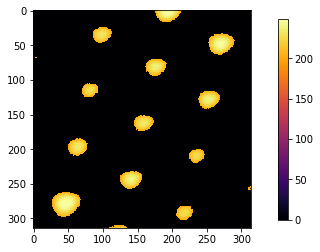

In [12]:
im_threshed = threshold(im_dat,200)
data_plotter(im_threshed)

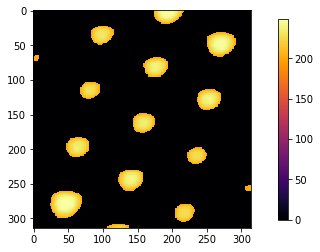

In [13]:
temp_im = list(maximum_filter(im_threshed, size=(5,5)))
data_plotter(temp_im)

In [14]:
########################### find peaks of lattice sites #################

shape_dat = im_dat.shape
    
num_rows_dat = shape_dat[0]
num_cols_dat = shape_dat[1]

temp_im_arr = np.asarray(temp_im).reshape(num_rows_dat,num_cols_dat)

row_arr = []
col_arr = []

for rows in range(num_rows_dat):
    for col in range(num_cols_dat):
        if (temp_im_arr[rows,col] == im_threshed[rows,col] and temp_im_arr[rows,col] != 0 and temp_im_arr[rows,col] > 225):
            row_arr.append(rows)
            col_arr.append(col)


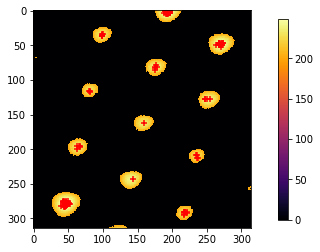

In [15]:
plt.figure() # Creating the figure
plt.scatter(col_arr,row_arr,c='r', marker = "+")
img_lim = plt.imshow(im_threshed, interpolation = "nearest", cmap = "inferno",vmin = np.min(im_threshed), vmax=np.max(im_threshed))
clb = plt.colorbar(img_lim, fraction=0.03, pad=0.08) # Use these as your
plt.show() 

In [16]:
x_point_all = []
y_point_all = []

# This loop makes sure that points that are closer than 20 units in both x and y values are isolated so
# we have one point corresponding to each lattice 

for i in range(len(row_arr)):
    if(i != len(row_arr)-1):
        if(row_arr[i+1] - row_arr[i] > 20 or col_arr[i+1] - col_arr[i] > 20):
#             print(row_arr[i],col_arr[i])
            x_point_all.append(row_arr[i])
            y_point_all.append(col_arr[i])
            x_point_all.append(row_arr[i+1])
            y_point_all.append(col_arr[i+1])
    if(i == len(row_arr)):
        if(row_arr[i] - row_arr[0] > 20 or col_arr[i] - col_arr[0] > 20):
            x_point_all.append(row_arr[i])
            y_point_all.append(col_arr[i])
            x_point_all.append(row_arr[i])
            y_point_all.append(col_arr[i])
            


############# lattice sites #################
99.0 35.5
269.0 49.5
175.5 82.0
80.5 116.5
251.0 127.5
160.0 162.0
63.0 197.0
236.0 210.5
143.0 243.0
44.0 279.0


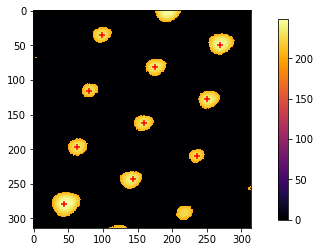

In [17]:
############################## Average the peak points of each lattice together and return single point ############
single_centers_x = []
single_centers_y = []


for i in range(len(y_point_all)):
    if(i != len(y_point_all)-1):
        if(x_point_all[i+1] - x_point_all[i] < 20 and y_point_all[i+1] - y_point_all[i] < 20):
            single_centers_x.append( (x_point_all[i]+x_point_all[i+1]) /2) 
            single_centers_y.append( (y_point_all[i]+y_point_all[i+1]) /2)
#             single_centers_x.append(x_point_all[i+1])
#             single_centers_y.append(y_point_all[i+1])
    if(i == len(y_point_all)):
        if(x_point_all[i] - x_point_all[0] < 20 and y_point_all[i] - y_point_all[0] < 20):
            single_centers_x.append( (x_point_all[i]+x_point_all[0]) / 2)
            single_centers_y.append( (y_point_all[i]+y_point_all[0]) / 2)
#             single_centers_x.append(x_point_all[0])
#             single_centers_y.append(y_point_all[0])
            
            
print("############# lattice sites #################")

for i in range(len(single_centers_y)):
    print(single_centers_y[i],single_centers_x[i])
  
plt.figure() # Creating the figure
plt.scatter(single_centers_y,single_centers_x,c='r', marker = "+")
img_lim = plt.imshow(im_threshed, interpolation = "nearest", cmap = "inferno",vmin = np.min(im_threshed), vmax=np.max(im_threshed))
clb = plt.colorbar(img_lim, fraction=0.03, pad=0.08) # Use these as your
plt.show() 

[ 99. -36.]
[ 19. -82.]


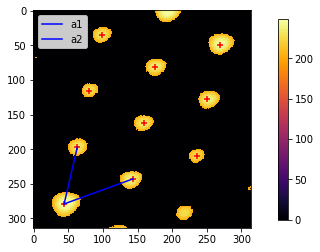

In [18]:
### Set origin ###

O = np.array( [ single_centers_y[-1] , single_centers_x[-1] ] )
a1 = np.array([ single_centers_y[-2] , single_centers_x[-2] ] )
a2 = np.array([ single_centers_y[-4] , single_centers_x[-4] ] )

a1_vec = a1 - O
a2_vec = a2 - O

print(a1_vec)
print(a2_vec)

Oa1x = [ O[0], a1[0] ] 
Oa1y = [ O[1], a1[1] ]

Oa2x = [ O[0], a2[0] ] 
Oa2y = [ O[1], a2[1] ]


plt.plot(Oa1x,Oa1y, color = "b", label = "a1")
plt.plot(Oa2x,Oa2y, color = "b", label = "a2")

plt.scatter(single_centers_y,single_centers_x,c='r', marker = "+")
img_lim = plt.imshow(im_threshed, interpolation = "nearest", cmap = "inferno",vmin = np.min(im_threshed), vmax=np.max(im_threshed))
clb = plt.colorbar(img_lim, fraction=0.03, pad=0.08)
plt.legend()
plt.show() 

In [19]:
######################## Isolate specific (center in this case) hexagonal lattice #####################
        
filter_col = []
filter_row = []

for i in range(len(single_centers_y)):
    if( 60 < single_centers_x[i] < 250 and  50 < single_centers_y[i] < 260):
        filter_row.append(single_centers_x[i])
        filter_col.append(single_centers_y[i])
        
# plt.figure() # Creating the figure
# plt.scatter(filter_col,filter_row,c='r', marker = "+")
# img_lim = plt.imshow(im_threshed, interpolation = "nearest", cmap = "inferno",vmin = np.min(im_threshed), vmax=np.max(im_threshed))
# clb = plt.colorbar(img_lim, fraction=0.03, pad=0.08) # Use these as your
# plt.show() 

In [20]:
for i in range(len(single_centers_y)):
    print(single_centers_y[i],single_centers_x[i])
  

99.0 35.5
269.0 49.5
175.5 82.0
80.5 116.5
251.0 127.5
160.0 162.0
63.0 197.0
236.0 210.5
143.0 243.0
44.0 279.0


In [23]:

# modif_y = [61,81,142,160,175,237,251]
# modif_x = [195,116,242,162,85,212,127]

modif_y = [61,81,175,251,237,142,61]
modif_x = [195,116,85,127,212,242,195]



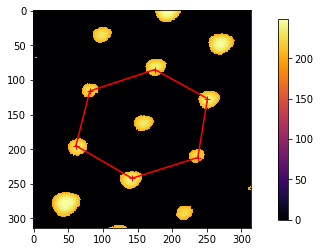

In [24]:
plt.figure() # Creating the figure
plt.plot(modif_y,modif_x,c='r', marker = "+")
img_lim = plt.imshow(im_threshed, interpolation = "nearest", cmap = "inferno",vmin = np.min(im_threshed), vmax=np.max(im_threshed))
clb = plt.colorbar(img_lim, fraction=0.03, pad=0.08) # Use these as your
plt.show() 

In [25]:
# This function takes three primitive vector a_1,a_2,a_3 which are calculated from the real space
# STM images. The primitive vectors are then fourier transformed in reciprocal/K-space/momentum space vector b1,b2,b3

# def reciprocal_space_transform(a_1,a_2,_a3):
#     b_1 = (2*np.pi) * np.cross(a_2,a_3) / (np.dot(a_1,np.cross(a_2,a_3)))
#     b_2 = (2*np.pi) * np.cross(a_3,a_1) / (np.dot(a_1,np.cross(a_2,a_3)))
#     b_3 = (2*np.pi) * np.cross(a_1,a_2) / (np.dot(a_1,np.cross(a_2,a_3)))
    
#     return b_1,b_2,b_3


def reciprocal_space_transform(a_1x, a_1y, a_2x, a_2y):
    
    b_1x = (2*np.pi) * a_2y / ( (a_1x*a_2y) - (a_1y*a_2x) )
    b_1y = (2*np.pi) * (-1)*a_2x / ( (a_1x*a_2y) - (a_1y*a_2x) )

    b_2x = (2*np.pi) * (-1)*a_1y / ( (a_1x*a_2y) - (a_1y*a_2x) )
    b_2y = (2*np.pi) * a_1x / ( (a_1x*a_2y) - (a_1y*a_2x) )
    
    b1 = np.array([b_1x,b_1y])   
    b2 = np.array([b_2x,b_2y])
    return b1,b2

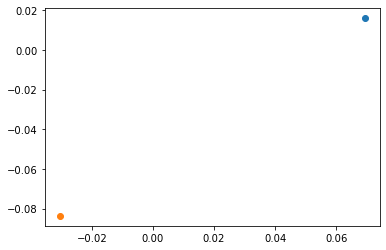

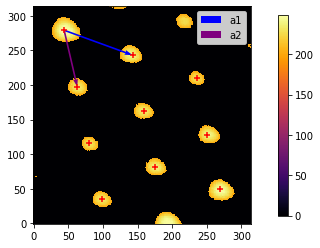

In [57]:

# Vector origin location
X = [single_centers_y[-1]]
Y = [single_centers_x[-1]]
# [ single_centers_y[-1] , single_centers_x[-1] ] 


# a1_vec = a1 - O
# a2_vec = a2 - O

# Directional vectors
U = [a1_vec[0]]  
V = [a1_vec[1]]  

W = [a2_vec[0]]  
Z = [a2_vec[1]]  
  
# Creating plot
plt.quiver(X, Y, U, V, color='b', units='xy', scale=1, label = "a1")
plt.quiver(X, Y, W, Z, color='purple', units='xy', scale=1, label = "a2")

plt.scatter(single_centers_y,single_centers_x,c='r', marker = "+")
img_lim = plt.imshow(im_threshed, interpolation = "nearest", cmap = "inferno",vmin = np.min(im_threshed), vmax=np.max(im_threshed))
clb = plt.colorbar(img_lim, fraction=0.03, pad=0.08) # Use these as your
plt.gca().invert_yaxis()
plt.legend()



[ 99. -36.]
[ 19. -82.]
[0.06930605 0.01605872]
[-0.03042705 -0.08367438]


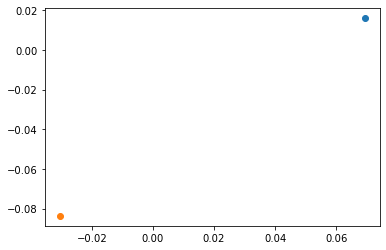

In [62]:
print(a1_vec)
print(a2_vec)

b1,b2 = reciprocal_space_transform(a1_vec[0],a1_vec[1], a2_vec[0], a2_vec[1])

plt.scatter(b1[0],b1[1])
plt.scatter(b2[0],b2[1])

print(b1)
print(b2)


In [27]:
########################### Simulation of Lattice Sites #########################
########################### Simulation of Lattice Sites #########################
########################### Simulation of Lattice Sites #########################
########################### Simulation of Lattice Sites #########################

In [30]:
################ This function simulates the twisted graphene lattice structure in 2D k-space ####################

# alpha : lattice constant (0.246 nm for Graphene)
# sigma : poisson ratio of material (0.16 for Graphene)
# epsilon : strain percentage
# theta_s : applied strain angle
# theta_t : Graphene stack twist angle

def sim_kspace_plot(alpha, sigma, epsilon, theta_s,theta_t):
    print("function is not yet completed")
    
    a_0 = alpha
    #a_0 = 0.246 * (10**(-9)) #meters
    k = 4*(np.pi) / ( np.sqrt(3) * a_0)
    
    ################# define some essential and simple functions ###########
    
    def deg_to_rad(degree):
        return degree * np.pi/180
    
    def rot_matrix(angle):
        ret_mat = np.array([[np.cos(angle),(-1)*np.sin(angle)],[np.sin(angle),np.cos(angle)]])
        return ret_mat

    ################ Define k-space lattice sites #############

    k_1 = np.array([1,0]) * k
    k_1 = k_1.reshape(2,1)


    k_2 = np.array([np.cos(deg_to_rad(60)), np.sin(deg_to_rad(60))]) * k
    k_2 = k_2.reshape(2,1)

    k_3 = np.array([np.cos(deg_to_rad(120)), np.sin(deg_to_rad(120))]) * k
    k_3 = k_3.reshape(2,1)
    
    k_x_vals = [k_1[0],k_2[0],k_3[0],-k_1[0],-k_2[0],-k_3[0]]
    k_y_vals = [k_1[1],k_2[1],k_3[1],-k_1[1],-k_2[1],-k_3[1]]
    
    ################ k prime defintions #############
    
    theta_twist = theta_t
    theta_twist_rad = deg_to_rad(theta_twist)
    rotation_matrix = np.array([[np.cos(theta_twist_rad),(-1)*np.sin(theta_twist_rad)],[np.sin(theta_twist_rad),np.cos(theta_twist_rad)]])

    # rotation_matrix

    k_1_prime = np.matmul(rotation_matrix,k_1)


    k_2_prime= np.matmul(rotation_matrix,k_2)


    k_3_prime= np.matmul(rotation_matrix,k_3)
    
    origin = [0,0]
 
    k_prime_x_vals = [k_1_prime[0],k_2_prime[0],k_3_prime[0],-k_1_prime[0],-k_2_prime[0],-k_3_prime[0]]
    k_prime_y_vals = [k_1_prime[1],k_2_prime[1],k_3_prime[1],-k_1_prime[1],-k_2_prime[1],-k_3_prime[1]]
    
    ################# define moire wavelengths ##############
    
    K_1 = k_1_prime - k_1

    K_2 = k_2_prime - k_3

    K_3 = k_3_prime - k_3
    
    ################ define strain matrix and strain wave vectors ###########

    E_matrix = np.array([[(1/(1+epsilon)), 0],[0,(1/(1-(sigma*epsilon)))]])
    
    S_matrix = rot_matrix(theta_s) * E_matrix * rot_matrix(theta_s)
    
    k_1s = np.matmul(S_matrix, k_1)

    k_2s = np.matmul(S_matrix, k_2)

    k_3s = np.matmul(S_matrix, k_3)

    K_1s = k_1_prime - k_1s

    K_2s = k_2_prime - k_2s

    K_3s = k_3_prime - k_3s
    
    k_xs_vals = [k_1s[0],k_2s[0],k_3s[0],-k_1s[0],-k_2s[0],-k_3s[0]]
    k_ys_vals = [k_1s[1],k_2s[1],k_3s[1],-k_1s[1],-k_2s[1],-k_3s[1]]
    
    ####################### plot k and k prime points with and without strain ################
    
    plt.scatter(k_prime_x_vals,k_prime_y_vals,color = "red", label = "twisted lattice")
    plt.scatter(k_x_vals,k_y_vals,color = "blue", label = "primary lattice")
    plt.scatter(origin[0],origin[1],color = "green", label = "origin")
    plt.scatter(k_xs_vals,k_ys_vals,color = "orange" , label = "lattice w/strain")
    plt.legend()
#     plt.scatter(k_x_vals,k_y_vals,color = "blue")
#     plt.scatter(origin[0],origin[1],color = "green")

function is not yet completed


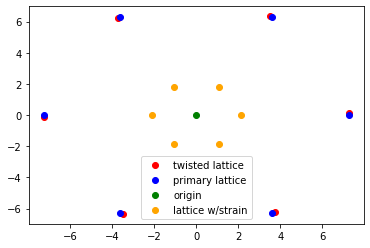

In [31]:
sim_kspace_plot(1,0,0,1,1)